### 다중 선형회귀 - 보스턴 주택 가격

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- 데이터 탐색

In [5]:
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


- Feature 별 산점도와 선형회귀선

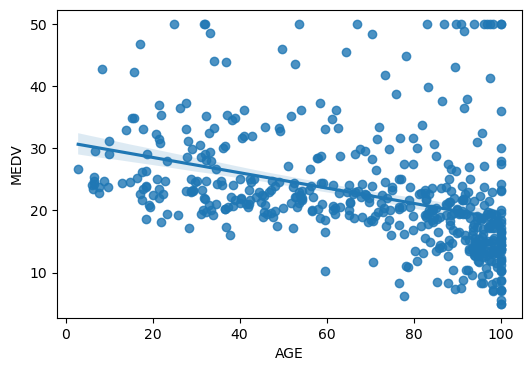

In [10]:
plt.figure(figsize=(6,4))
sns.regplot(x='AGE', y='MEDV', data=df);

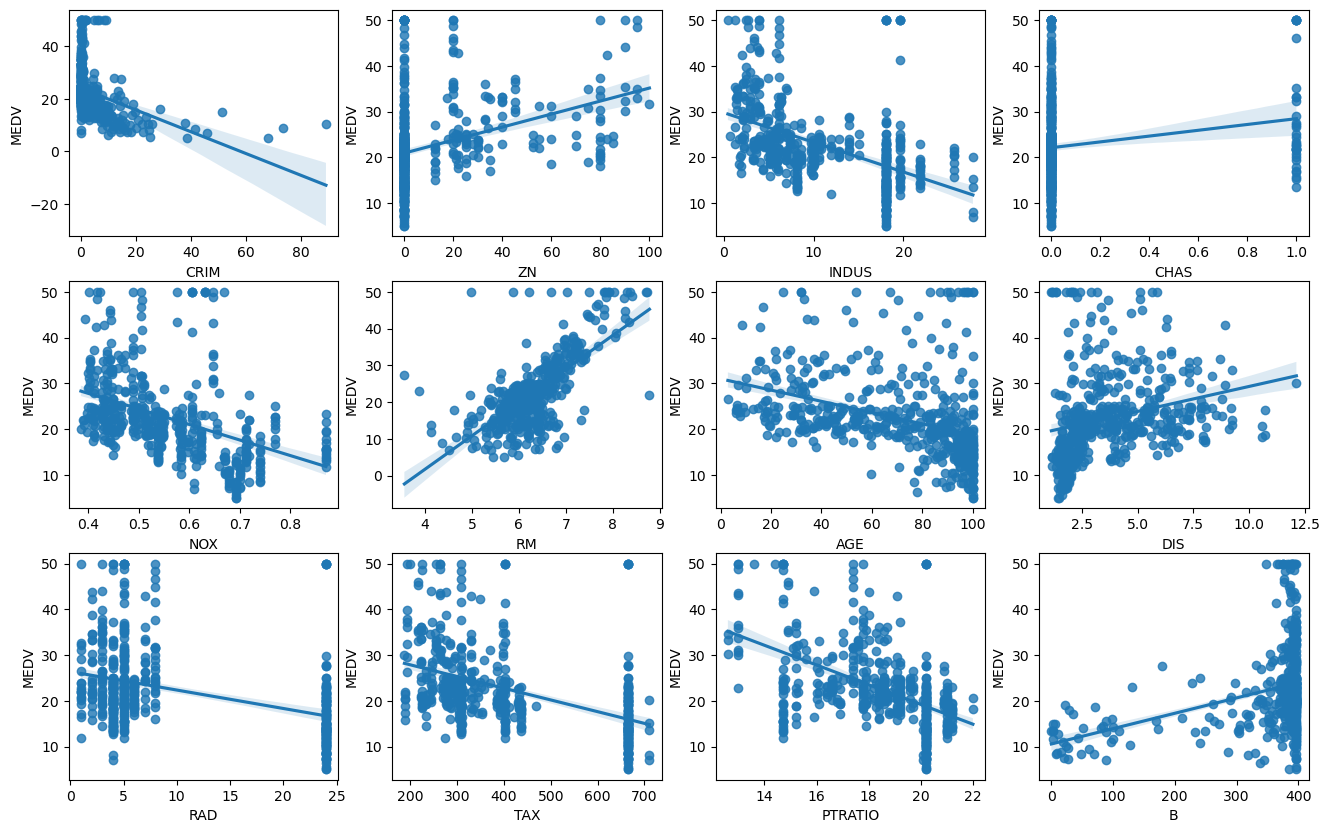

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(16, 10))
for i, feature in enumerate(df.columns[:-3]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[row][col])

- Feature 별 결정계수 (R squared)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
for feature in df.columns[:-2]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, df.MEDV.values)
    score = lr.score(X, df.MEDV.values)
    print(f'{feature}: {score:.4f}')

CRIM: 0.1508
ZN: 0.1299
INDUS: 0.2340
CHAS: 0.0307
NOX: 0.1826
RM: 0.4835
AGE: 0.1421
DIS: 0.0625
RAD: 0.1456
TAX: 0.2195
PTRATIO: 0.2578
B: 0.1112
LSTAT: 0.5441


### 다중 선형회귀

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-2].values, df.MEDV.values, test_size=0.1, random_state=2023
)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# 결정 계수 (R squared)
lr.score(X_test, y_test)

0.727171746953357

In [17]:
# 가중치 (weight)
lr.coef_

array([-1.08509288e-01,  4.73634512e-02,  2.93056817e-02,  2.88757692e+00,
       -1.77344364e+01,  3.87404592e+00, -1.10277063e-03, -1.47219747e+00,
        2.79148815e-01, -1.16000238e-02, -8.96196130e-01,  7.58599968e-03,
       -5.45214900e-01])

In [18]:
# 바이어스
lr.intercept_

35.78228139597108

- 회귀식

    - Target = -0.0011 * CRIM + 0.0474 * ZN ,,, + -0.55 * LSTAT + 35.7822


- 테스트 데이터에 적용

In [19]:
X_test[0], y_test[0]

(array([  7.02259,   0.     ,  18.1    ,   0.     ,   0.718  ,   6.006  ,
         95.3    ,   1.8746 ,  24.     , 666.     ,  20.2    , 319.98   ,
         15.7    ]),
 14.2)

In [25]:
# weight와 bias를 이용해서 직접 값을 계산
np.dot(X_test[0], lr.coef_) + lr.intercept_

17.958305169593654

In [24]:
# predict() method 사용
lr.predict(X_test[0].reshape(1, -1))[0]

17.958305169593654

In [36]:
# 10개 테스트 데이터에 적용
for i in range(10):
    print(f'실제값:{y_test[i]} 예측값: {lr.predict(X_test[i].reshape(1, -1))[0].round(2)}')

실제값:14.2 예측값: 17.96
실제값:15.6 예측값: 15.61
실제값:23.7 예측값: 27.47
실제값:20.4 예측값: 19.7
실제값:23.1 예측값: 24.96
실제값:50.0 예측값: 40.88
실제값:23.2 예측값: 22.26
실제값:36.0 예측값: 36.15
실제값:17.1 예측값: 19.57
실제값:14.1 예측값: 16.12


##### 회귀는 꼭 선형회귀이어야 하는가?

- SVR

In [38]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [41]:
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

- Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

- XG Boost

In [46]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

- Linear Regression

In [43]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

- 비교

In [50]:
print('\t\tLR\tSV\tRF\tXG')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')

		LR	SV	RF	XG
R squared	0.7272	0.2042	0.8613	0.8662


In [52]:
print('\t\tLR\tSV\tRF\tXG')
print(f'Mean squared E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

		LR	SV	RF	XG
Mean squared E	18.3886	53.6350	9.3466	9.0214


In [56]:
df = pd.DataFrame({
    'y': y_test, 'LR':pred_lr, 'SV':pred_sv, 'RF':pred_rf, 'XG':pred_xg
})

In [57]:
df

,y,LR,SV,RF,XG
0,14.2,17.958305,15.017989,15.338,15.283259
1,15.6,15.606944,21.968696,16.819,15.724390
2,23.7,27.474924,23.817999,24.465,26.750814
3,20.4,19.702224,22.621478,19.539,19.455095
4,23.1,24.958797,23.143946,23.844,23.837950
5,50.0,40.883669,19.982511,47.176,49.939842
6,23.2,22.255425,15.991492,19.328,18.950800
7,36.0,36.151795,22.930248,36.970,36.674747
8,17.1,19.573404,19.179914,18.332,18.373552
9,14.1,16.121493,13.387749,14.953,14.692045


### 규제 선형회귀

- Ridge - L2 규제

In [58]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)

Ridge(random_state=2023)

In [59]:
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)

r2_rg, mse_rg

(0.7247569398981956, 18.55136320289898)

- Lasso - L1 규제

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 2023,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [62]:
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)

In [63]:
print('\t\tLR\tSV\tRF\tXG\tRG\tLS')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}\t{r2_rg:.4f}\t{r2_ls:.4f}')

		LR	SV	RF	XG	RG	LS
R squared	0.7272	0.2042	0.8613	0.8662	0.7248	0.6759


In [64]:
print('\t\tLR\tSV\tRF\tXG\tRG\tLS')
print(f'Mean squared E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}\t{mse_rg:.4f}\t{mse_ls:.4f}')

		LR	SV	RF	XG	RG	LS
Mean squared E	18.3886	53.6350	9.3466	9.0214	18.5514	21.8475
